In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [119]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [115]:
world.head(10)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


**Remove continents which have only one country in dataframe.**


In [104]:
# continents with only one country
# world.continent.value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

In [122]:
# remove these continents
world = world[world['continent'].duplicated(keep=False)]
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [120]:
world_filtered = world.iloc[world['pop_est'].sort_values(ascending=False).head(3).index]

In [117]:
# world_filtered = world.groupby('continent')['pop_est'].sum()
# world_filtered.sort_values()
# 1,219,176,238
# 4,389,144,868

**Print the 'world_filtered' dataframe.**

In [118]:
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
140,23508428,Asia,Taiwan,TWN,1127000.0,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."
99,157826578,Asia,Bangladesh,BGD,628400.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

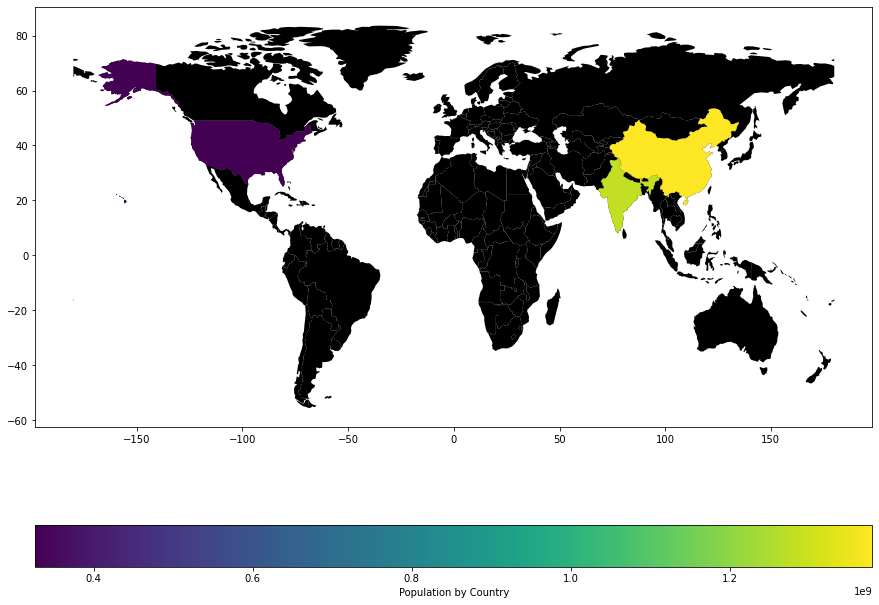

In [123]:
# create figure and axes
fig, ax = plt.subplots(figsize=(15, 12))
# create map from world_filtered data-frame
world.plot(ax=ax, color='black')
world_filtered.plot(column='pop_est', ax=ax, legend=True,
                    legend_kwds={'label': 'Population by Country',
                                 'orientation': 'horizontal'})

plt.show()
# add the rest of the countries

### Plotly

In [130]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(world_filtered['name'],geojson\
                    =world_filtered['geometry'],
                    color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                    )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['name'] but received: district

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy`

In [133]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
needed_cities = ['New York', 'Berlin', 'Paris', 'Toronto',
                                                'Calgary', 'Tokyo']
cities =cities.loc[cities['name'].isin(needed_cities) ]
cities.head()

,name,geometry
175,Berlin,POINT (13.39960 52.52376)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)


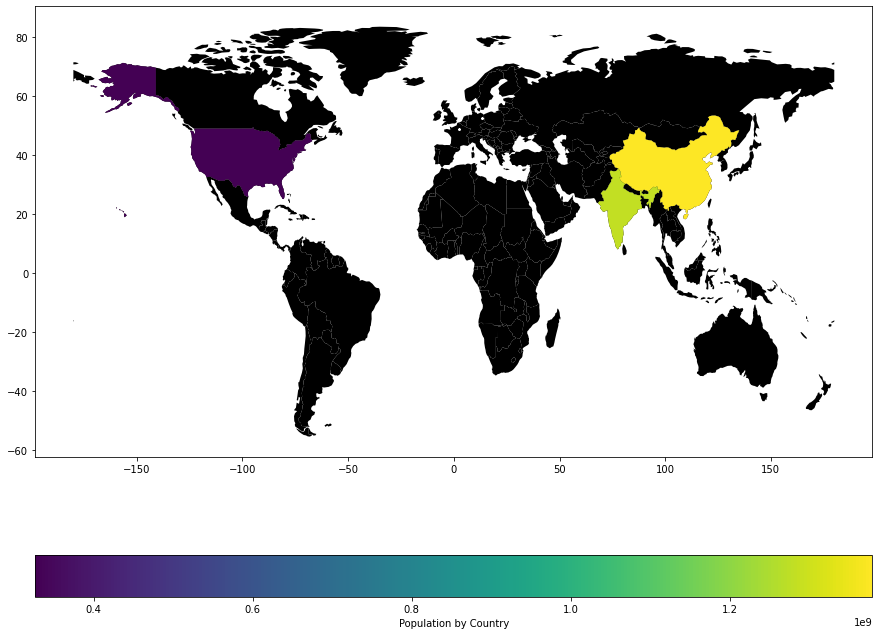

In [134]:
# get geometry
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
needed_cities = ['New York', 'Berlin', 'Paris', 'Toronto',
                                                'Calgary', 'Tokyo']
cities =cities.loc[cities['name'].isin(needed_cities) ]

# create figure and axes
fig, ax = plt.subplots(figsize=(15, 12))
# create map from world_filtered data-frame
world.plot(ax=ax, color='black')
world_filtered.plot(column='pop_est', ax=ax, legend=True,
                    legend_kwds={'label': 'Population by Country',
                                 'orientation': 'horizontal'})
cities.plot(ax=ax ,marker='*', color='white', markersize=5)
plt.show()



# create map from world_filtered data-frame




# add the rest of the countries



# add cities
